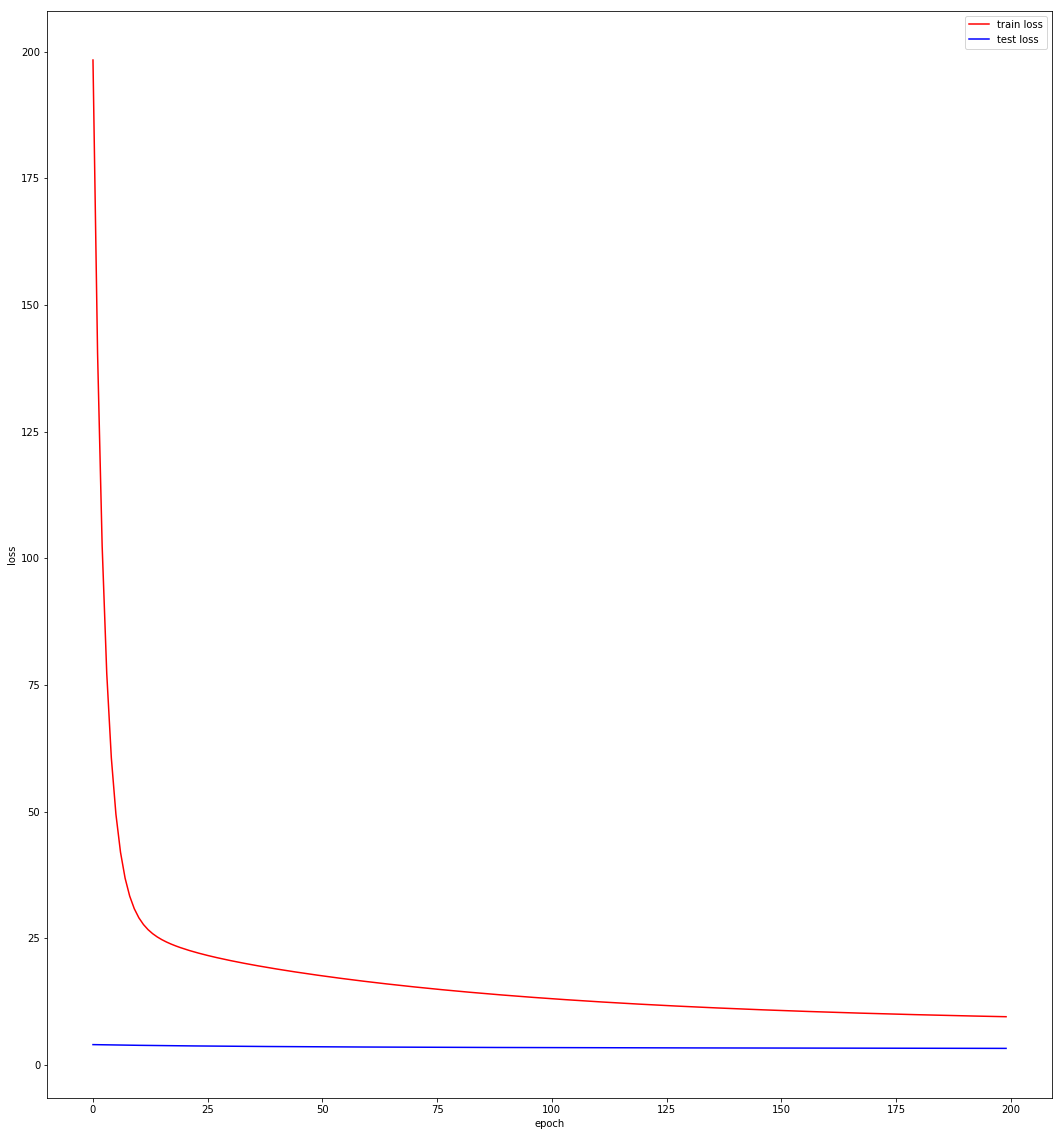

In [7]:
# %load regretion.py
#!/usr/bin/env python2
"""
Created on Sat Dec  9 19:32:01 2017

@author: lrl
"""

from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

x,y=load_svmlight_file("/home/lrl/ML-logits/housing_scale")
x=x.todense()

m,n=np.shape(x)
y=y.reshape((m,1))
x_data=np.ones((m,n+1))
x_data[:,:-1]=x[:,:]

x_train,x_test,y_train,y_test=train_test_split(x_data,y,test_size=0.2)


theta=np.ones((n+1,1)) 
    
 
def batchGradienDenscent(epoch,x,y,theta,learning_rate):
    Cost=[]
    for i in range(0,epoch):
      
        hypothesis=np.dot(x,theta)
        #print hypothesis.shape
        loss=hypothesis-y
        #print loss.shape
        gradient=np.dot(x.T,loss)/m
        #print(gradient.shape)
        theta=theta-learning_rate*gradient
        
        #print(theta.shape)
        #cost=np.average(np.abs(np.dot(x,theta)-y))
        cost=1.0/2/m*np.sum(np.square(np.dot(x,theta)-y))
        
        Cost.append(cost)
    #print Cost
       
    return Cost,theta
    

learning_rate=0.05
epoch=200

cost_train,theta = batchGradienDenscent(epoch,x_train,y_train,theta,learning_rate)
#print theta
cost_test,theta = batchGradienDenscent(epoch,x_test,y_test,theta,learning_rate)
#print theta
#,n=np.shape(x_test)
#test=np.ones((m,n+1))
#test[:,:-1]=x_test
#pre=np.dot(x_test,theta)
%matplotlib inline
epoches=range(200)
plt.figure(figsize=(18,20))
plt.plot(epoches,cost_train,"-",color="r",label="train loss")
plt.plot(epoches,cost_test,"-",color="b",label="test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()